# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# # Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaz
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | hargeysa
Processing Record 4 of Set 1 | athni
Processing Record 5 of Set 1 | izhma
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | eyl
Processing Record 8 of Set 1 | general roca
Processing Record 9 of Set 1 | la rioja
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | san cristobal
Processing Record 15 of Set 1 | neryungri
Processing Record 16 of Set 1 | coihaique
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | tilichiki
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | airai
Processing Record 2

Processing Record 39 of Set 4 | klaksvik
Processing Record 40 of Set 4 | fare
Processing Record 41 of Set 4 | dongfeng
Processing Record 42 of Set 4 | edmundston
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | challapata
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | visnes
Processing Record 47 of Set 4 | fria
Processing Record 48 of Set 4 | kalisz
Processing Record 49 of Set 4 | port moresby
Processing Record 0 of Set 5 | port elizabeth
Processing Record 1 of Set 5 | black river
Processing Record 2 of Set 5 | kysyl-syr
Processing Record 3 of Set 5 | narsaq
Processing Record 4 of Set 5 | vyartsilya
Processing Record 5 of Set 5 | gladstone
Processing Record 6 of Set 5 | zonguldak
Processing Record 7 of Set 5 | marcona
City not found. Skipping...
Processing Record 8 of Set 5 | kaseda
Processing Record 9 of Set 5 | lorengau
Processing Record 10 of Set 5 | san ramon
Processing Record 11 of Set 5 | nizhneyansk
City not found. Skipping...
Proce

Processing Record 26 of Set 8 | kot putli
City not found. Skipping...
Processing Record 27 of Set 8 | yarmouth
Processing Record 28 of Set 8 | asfi
Processing Record 29 of Set 8 | ewa beach
Processing Record 30 of Set 8 | mahebourg
Processing Record 31 of Set 8 | roanoke
Processing Record 32 of Set 8 | baijiantan
Processing Record 33 of Set 8 | antsohihy
Processing Record 34 of Set 8 | fairburn
Processing Record 35 of Set 8 | fereydunshahr
Processing Record 36 of Set 8 | coquimbo
Processing Record 37 of Set 8 | deniliquin
Processing Record 38 of Set 8 | northam
Processing Record 39 of Set 8 | port-gentil
Processing Record 40 of Set 8 | dullewala
Processing Record 41 of Set 8 | praia da vitoria
Processing Record 42 of Set 8 | dombovar
Processing Record 43 of Set 8 | ribas do rio pardo
Processing Record 44 of Set 8 | nome
Processing Record 45 of Set 8 | zavoronezhskoye
Processing Record 46 of Set 8 | tomatlan
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | olafsvik


Processing Record 14 of Set 12 | saint-pierre
Processing Record 15 of Set 12 | nioki
Processing Record 16 of Set 12 | richards bay
Processing Record 17 of Set 12 | novyy svit
Processing Record 18 of Set 12 | sukumo
Processing Record 19 of Set 12 | aykhal
Processing Record 20 of Set 12 | karaul
City not found. Skipping...
Processing Record 21 of Set 12 | sorong
Processing Record 22 of Set 12 | tiznit
Processing Record 23 of Set 12 | lar
Processing Record 24 of Set 12 | yuancheng
Processing Record 25 of Set 12 | cody
Processing Record 26 of Set 12 | siderno
Processing Record 27 of Set 12 | chatsu
City not found. Skipping...
Processing Record 28 of Set 12 | dicabisagan
Processing Record 29 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 12 | iki-burul
Processing Record 31 of Set 12 | sandwick
Processing Record 32 of Set 12 | wajir
Processing Record 33 of Set 12 | colomi
Processing Record 34 of Set 12 | kismayo
Processing Record 35 of Set 12 | moerai
Processing

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaz,52.9113,87.3105,-11.11,94,100,3.69,RU,1674531230
1,faanui,-16.4833,-151.7500,25.73,78,100,8.22,PF,1674531230
2,hargeysa,9.5600,44.0650,12.10,94,95,4.96,SO,1674531230
3,athni,16.7333,75.0667,21.37,70,3,5.50,IN,1674530967
4,izhma,65.0083,53.9113,-9.87,92,21,4.14,RU,1674531231


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_weather.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_weather.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaz,52.9113,87.3105,-11.11,94,100,3.69,RU,1674531230
1,faanui,-16.4833,-151.7500,25.73,78,100,8.22,PF,1674531230
2,hargeysa,9.5600,44.0650,12.10,94,95,4.96,SO,1674531230
3,athni,16.7333,75.0667,21.37,70,3,5.50,IN,1674530967
4,izhma,65.0083,53.9113,-9.87,92,21,4.14,RU,1674531231


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

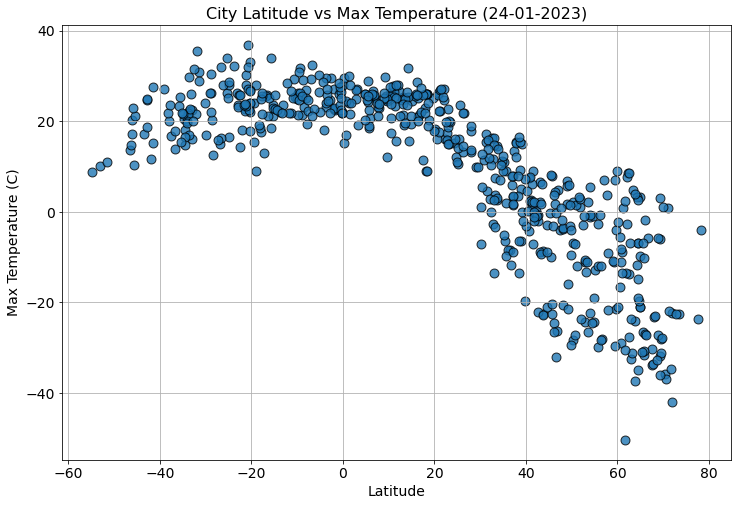

In [33]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(12, 8))

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],\
            edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)
plt.title(f"City Latitude vs Max Temperature ({time.strftime('%d-%m-%Y')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Max Temperature (C)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

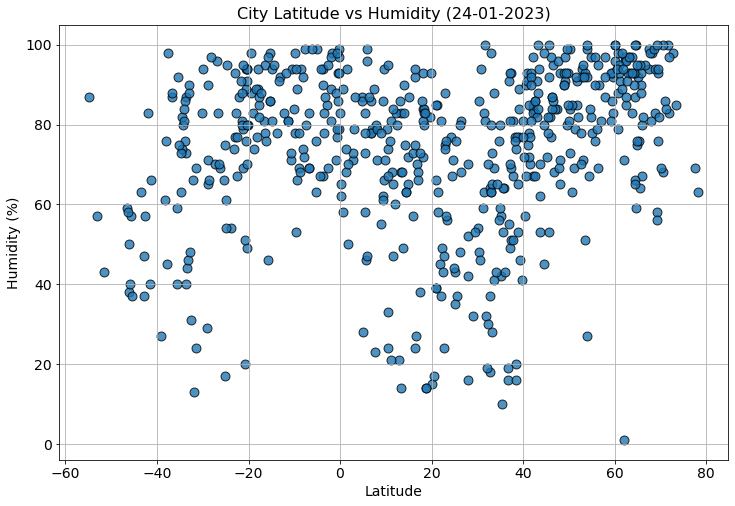

In [35]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], \
            edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({time.strftime('%d-%m-%Y')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Humidity (%)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

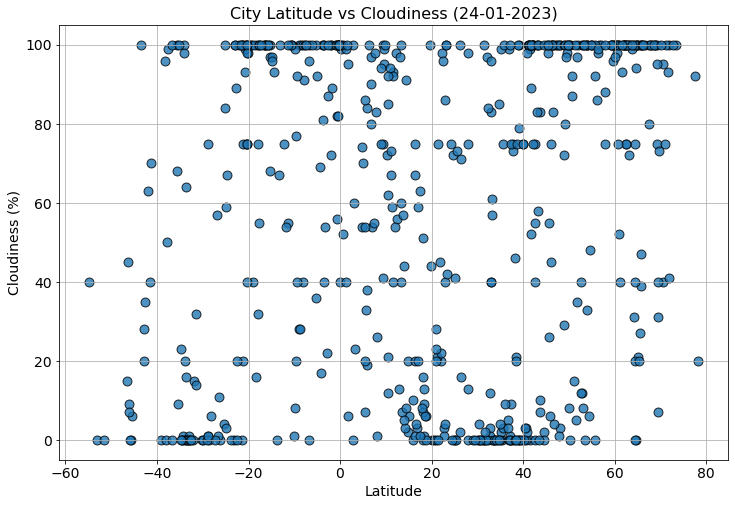

In [36]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],\
            edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({time.strftime('%d-%m-%Y')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Cloudiness (%)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

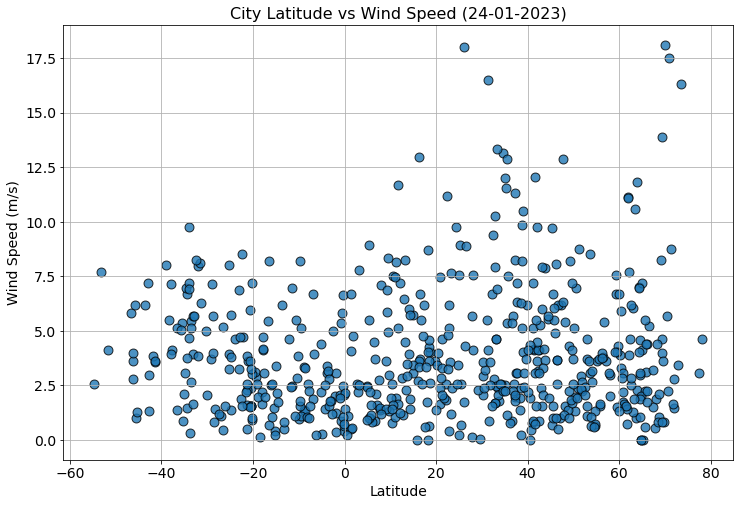

In [37]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], \
            edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({time.strftime('%d-%m-%Y')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Wind Speed (m/s)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values,xlabel,ylabel,xytext):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(12,8))
    plt.scatter(x_values, y_values, s=80)
    plt.plot(x_values,regress_values,"red",linewidth=2)
    plt.annotate(line_eq,xytext,fontsize=20,color="red")
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.tick_params(labelsize=14)
    print(f'The r-value is:{r_value}')
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaz,52.9113,87.3105,-11.11,94,100,3.69,RU,1674531230
2,hargeysa,9.5600,44.0650,12.10,94,95,4.96,SO,1674531230
3,athni,16.7333,75.0667,21.37,70,3,5.50,IN,1674530967
4,izhma,65.0083,53.9113,-9.87,92,21,4.14,RU,1674531231
6,eyl,7.9803,49.8164,22.86,71,26,7.09,SO,1674531231


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,faanui,-16.4833,-151.7500,25.73,78,100,8.22,PF,1674531230
5,bluff,-46.6000,168.3333,13.72,59,15,5.83,NZ,1674531231
7,general roca,-39.0333,-67.5833,27.01,27,0,8.00,AR,1674531232
9,arraial do cabo,-22.9661,-42.0278,23.61,93,100,3.24,BR,1674531232
10,vaini,-21.2000,-175.2000,30.09,79,20,3.60,TO,1674531233


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8426902729150502


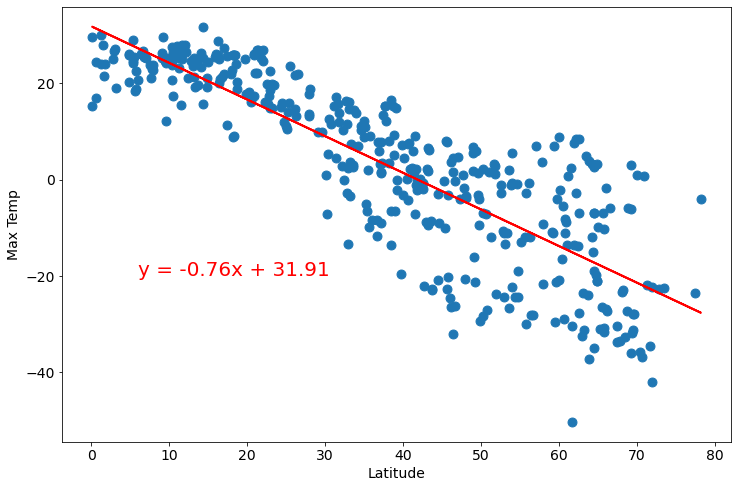

In [41]:
## Linear regression on Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], \
            y_values = northern_hemi_df["Max Temp"],xlabel = "Latitude",
            ylabel = "Max Temp",xytext = (6,-20))

The r-value is:0.4040320305340881


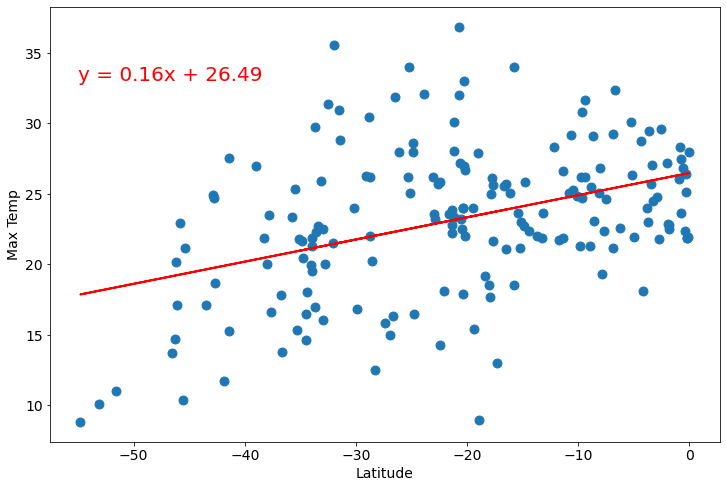

In [42]:
# Linear regression on Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], \
            y_values = southern_hemi_df["Max Temp"],xlabel = "Latitude",
            ylabel = "Max Temp",xytext = (-55,33))

**Discussion about the linear relationship:** 
##### From linear regression analysis based on maximum temperature and latitudes of two poles shoes northern hemisphere shows significantly close relation with increase latitude value there is decrease in max temperature. It is opposite in the case of southern hemisphere as latitude value increase the max temperature also rises.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.37095645425121915


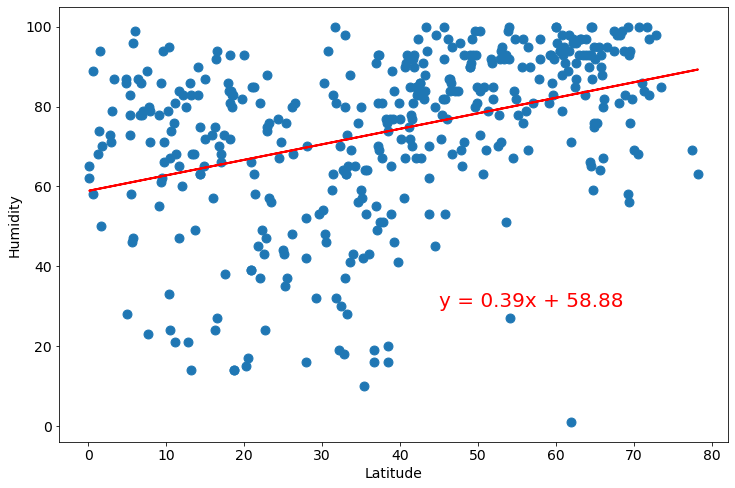

In [43]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Humidity"],xlabel = "Latitude",
            ylabel = "Humidity",xytext = (45,30))

The r-value is:0.47830338432911373


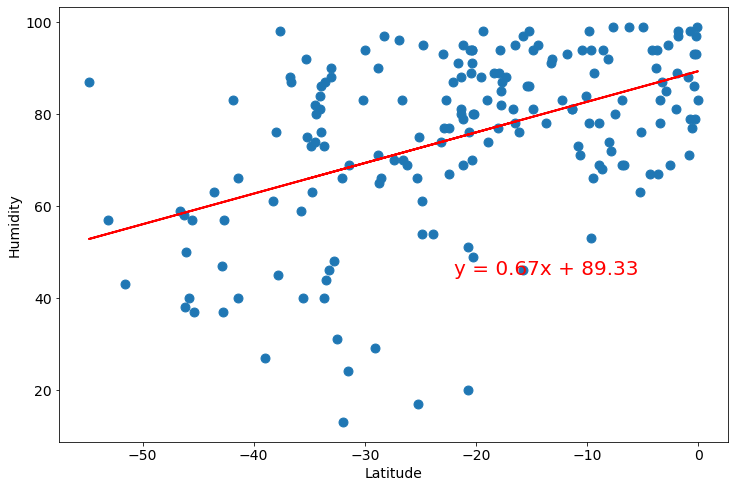

In [44]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values \
            = southern_hemi_df["Humidity"],xlabel = "Latitude",
            ylabel = "Humidity",xytext = (-22,45))

**Discussion about the linear relationship:** 
##### linear regression analysis of northern and southern hemisphere with respect to humidity has shown the value of R 0.3-0.4. That means there is less then 50% chance of the relation of increasing latitude with increasing humidity. Further the data is not enough get a broader picture. to get better results we need to include latitudes of the region with more salty and fresh water bodies.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.2919474449850956


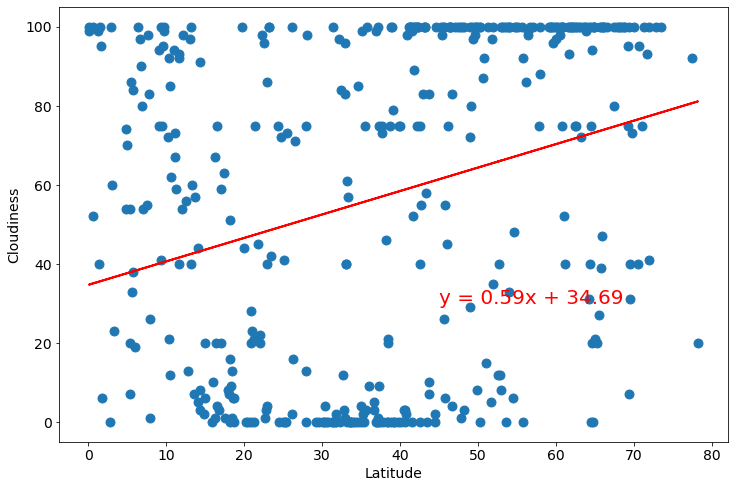

In [45]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Cloudiness"],xlabel = "Latitude",
            ylabel = "Cloudiness",xytext = (45,30))

The r-value is:0.4970091978745859


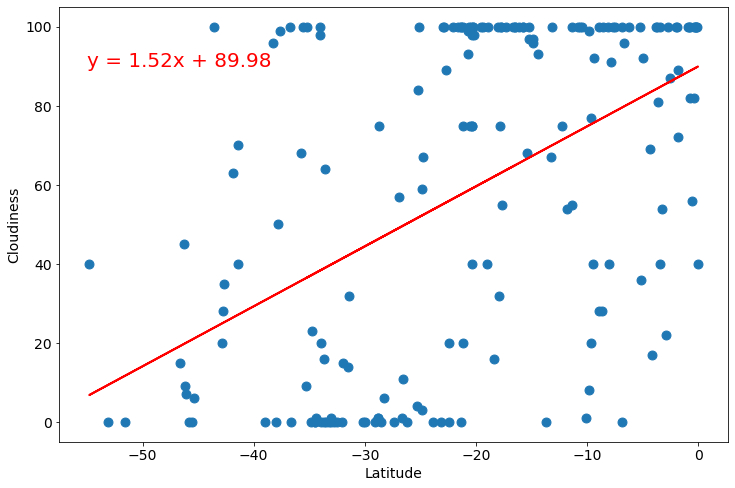

In [46]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Cloudiness"],xlabel = "Latitude",
            ylabel = "Cloudiness",xytext = (-55,90))

**Discussion about the linear relationship:**
#### linear regression analysis of northern and southern hemisphere with respect to cloudiness has shown the value of R 0.29 for northern hemisphere and for southern is 0.49 which shows more positive releation to the cloudiness. This relation could also be influenced by the factor of height above the sea surface and time of year, as both poles have opposite summers and winters.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.051696211848288494


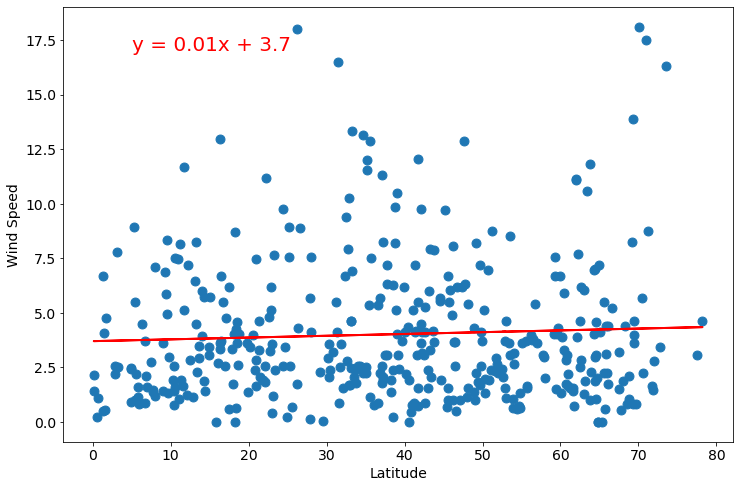

In [47]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Wind Speed"],xlabel = "Latitude",
            ylabel = "Wind Speed",xytext = (5,17))

The r-value is:-0.34075607487718534


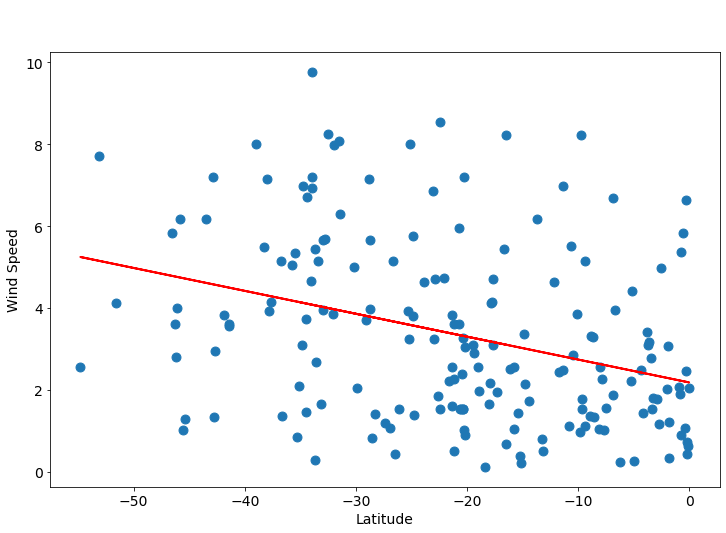

In [48]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Wind Speed"],xlabel = "Latitude",
            ylabel = "Wind Speed",xytext = (-48,11))

**Discussion about the linear relationship:** 
#### The r-value for the relation of increasing latitude and wind speed of southern hemisphere is negative while for northern it is showing weak relationship